## MVP Análise de Dados e Boas Práticas

**Nome:** Bianca Carvalho Lima

**Matrícula:** 4052025000297

**Dataset:** [mental-health-in-tech-survey](https://www.kaggle.com/datasets/osmi/mental-health-in-tech-survey/data)

## Descrição do Problema

Este conjunto de dados vem de uma pesquisa de 2014 que mede as atitudes em relação à saúde mental e a frequência de distúrbios de saúde mental no ambiente de trabalho de tecnologia. Problema principal que podemos analisar com este Dataset: Como a saúde mental é percebida e tratada no ambiente de trabalho na área de tecnologia, e quais fatores influenciam o acesso a tratamento e o estigma relacionado a questões mentais.
OBS: O dataset contém respostas com 1259 registros e 27 atributos originais.

## Hipóteses do Problema

Profissionais que trabalham em empresas que oferecem suporte formal à saúde mental têm maior probabilidade de buscar tratamento.

As hipóteses que tracei são as seguintes:

1. Existe relação entre idade e busca por tratamento?

2. Há diferenças de gênero na busca por tratamento?

3. A idade dos Funcionários implica em existir Programas de Bem-Estar dentro das empresas?

## Tipo de Problema

Este é um problema de **classificação supervisionada**. Dado um conjunto de variáveis preditoras como por benefits, care_options, age, self_employed, etc., o objetivo é prever se uma pessoa busca ou não por tratamento.

## Seleção de Dados

Não é necessária uma etapa de seleção de dados externa, pois o dataset já está curado e pronto para uso.

## Atributos do Dataset

Este conjunto de dados contém as seguintes informações:

1. **Timestamp:** Data e hora da resposta
2. **Age:** Idade
3. **Gender:** Gênero
4. **Country:** País
5. **state:** Se você mora nos EUA, em qual estado ou território vive?
6. **self_employed:** Você trabalha por conta própria?
7. **family_history:** Você tem histórico familiar de doenças mentais?
8. **treatment:** Você já buscou tratamento para uma condição de saúde mental?
9. **work_interfere:** Se você tem uma condição de saúde mental, sente que isso interfere no seu trabalho?
10. **no_employees:** Quantos funcionários sua empresa ou organização tem?
11. **remote_work:** Você trabalha remotamente (fora do escritório) pelo menos 50% do tempo?
12. **tech_company:** Seu empregador é principalmente uma empresa/organização de tecnologia?
13. **benefits:** Seu empregador oferece benefícios de saúde mental?
14. **care_options:** Você conhece as opções de cuidados de saúde mental oferecidas pelo seu empregador?
15. **wellness_program:** Seu empregador já discutiu saúde mental como parte de um programa de bem-estar para funcionários?
16. **seek_help:** Seu empregador fornece recursos para aprender mais sobre questões de saúde mental e como buscar ajuda?
17. **anonymity:** Seu anonimato é protegido se você optar por usufruir de recursos de tratamento para saúde mental ou abuso de substâncias?
18. **leave:** Quão fácil é para você tirar licença médica por uma condição de saúde mental?
19. **mental_health_consequence:** Você acha que discutir um problema de saúde mental com seu empregador teria consequências negativas?
20. **phys_health_consequence:** Você acha que discutir um problema de saúde física com seu empregador teria consequências negativas?
21. **coworkers:** Você estaria disposto a discutir um problema de saúde mental com seus colegas de trabalho?
22. **supervisor:** Você estaria disposto a discutir um problema de saúde mental com seu(s) supervisor(es) direto(s)?
23. **mental_health_interview:** Você mencionaria um problema de saúde mental em uma entrevista com um potencial empregador?
24. **phys_health_interview:** Você mencionaria um problema de saúde física em uma entrevista com um potencial empregador?
25. **mental_vs_physical:** Você sente que seu empregador leva a saúde mental tão a sério quanto a saúde física?
26. **obs_consequence:** Você já ouviu ou observou consequências negativas para colegas com condições de saúde mental no seu local de trabalho?
27. **comments:** Quaisquer observações ou comentários adicionais

## Importação das Bibliotecas Necessárias e Carga de Dados

Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização e pré-processamento dos dados, bem como o carregamento inicial do dataset.

In [189]:
# IMPORTANTE: EXECUTE ESTA CÉLULA PARA IMPORTAR SEUS DADOS DO KAGGLE,
import kagglehub
osmi_mental_health_in_tech_survey_path = kagglehub.dataset_download('osmi/mental-health-in-tech-survey')

print('Base de dados completa!')


Base de dados completa!


In [190]:
# Imports necessários
import os
os.listdir("/kaggle/input/")
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

warnings.filterwarnings('ignore')

In [191]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

In [192]:
# Dataset salvo em um dataframe
df = pd.read_csv(os.path.join(osmi_mental_health_in_tech_survey_path, 'survey.csv'))
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [193]:
# Tamanho do dataset
print('Shape: ')
df.shape

Shape: 


(1259, 27)

In [194]:
# Primeiras linhas
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


# Análise de Dados

Nesta etapa de Análise de Dados Exploratória (EDA) sobre o dataset, visamos entender a distribuição, as relações e as características das variáveis, o que é crucial para as etapas subsequentes de pré-processamento e modelagem.

In [195]:
# Mostra a estrutura do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [196]:
# Benefícios × Tratamento
print(pd.crosstab(df['benefits'], df['treatment'], normalize='index'))

treatment         No       Yes
benefits                      
Don't know  0.629902  0.370098
No          0.516043  0.483957
Yes         0.360587  0.639413


In [197]:
# Programas de bem-estar × Tratamento
print(pd.crosstab(df['wellness_program'], df['treatment'], normalize='index'))

treatment               No       Yes
wellness_program                    
Don't know        0.569149  0.430851
No                0.501188  0.498812
Yes               0.406114  0.593886


In [198]:
# Opções de cuidados de saúde mental × Tratamento
print(pd.crosstab(df['care_options'], df['treatment'], normalize='index'))

treatment           No       Yes
care_options                    
No            0.586826  0.413174
Not sure      0.608280  0.391720
Yes           0.308559  0.691441


## Tratamento de Valores Nulos e remoção de colunas desnecessárias



In [199]:
# Verificar a presença de valores nulos no dataset original
print("Valores nulos no dataset:")
df.isnull().sum()

Valores nulos no dataset:


,0
Timestamp,0
Age,0
Gender,0
Country,0
state,515
self_employed,18
family_history,0
treatment,0
work_interfere,264
no_employees,0


In [200]:
# Percorre todas as colunas do df e imprime quantos valores únicos existem em cada uma
for col in df.columns:
    print('Valores únicos em {} :'.format(col),len(df[col].unique()))

Valores únicos em Timestamp : 1246
Valores únicos em Age : 53
Valores únicos em Gender : 49
Valores únicos em Country : 48
Valores únicos em state : 46
Valores únicos em self_employed : 3
Valores únicos em family_history : 2
Valores únicos em treatment : 2
Valores únicos em work_interfere : 5
Valores únicos em no_employees : 6
Valores únicos em remote_work : 2
Valores únicos em tech_company : 2
Valores únicos em benefits : 3
Valores únicos em care_options : 3
Valores únicos em wellness_program : 3
Valores únicos em seek_help : 3
Valores únicos em anonymity : 3
Valores únicos em leave : 5
Valores únicos em mental_health_consequence : 3
Valores únicos em phys_health_consequence : 3
Valores únicos em coworkers : 3
Valores únicos em supervisor : 3
Valores únicos em mental_health_interview : 3
Valores únicos em phys_health_interview : 3
Valores únicos em mental_vs_physical : 3
Valores únicos em obs_consequence : 2
Valores únicos em comments : 161


In [201]:
# Entender quais países e estados estão representados nos dados dentro do dataset
# Verificar se a coluna "state" é relevante para a análise
# Verificar se há valores ausentes
print(df['Country'].value_counts())
print("\n \n")
print(df['state'].unique())

Country
United States             751
United Kingdom            185
Canada                     72
Germany                    45
Netherlands                27
Ireland                    27
Australia                  21
France                     13
India                      10
New Zealand                 8
Poland                      7
Italy                       7
Sweden                      7
Switzerland                 7
South Africa                6
Brazil                      6
Belgium                     6
Israel                      5
Singapore                   4
Bulgaria                    4
Russia                      3
Austria                     3
Finland                     3
Mexico                      3
Denmark                     2
Greece                      2
Portugal                    2
Colombia                    2
Croatia                     2
Slovenia                    1
Costa Rica                  1
Latvia                      1
Uruguay                     1
Sp

In [202]:
# Verificando quais colunas existem antes de 'dropar'
cols_to_drop = ['Timestamp', 'Country', 'state', 'comments']
existing_cols_to_drop = [col for col in cols_to_drop if col in df.columns]

if existing_cols_to_drop:
    df.drop(columns=existing_cols_to_drop, inplace = True)
    print(f"Colunas dropadas: {existing_cols_to_drop}")
else:
    print("Nenhuma das colunas especificadas foi encontrada no df")

Colunas dropadas: ['Timestamp', 'Country', 'state', 'comments']


In [203]:
# Identificar valores ausentes em colunas específicas do df
df[['benefits', 'treatment', 'wellness_program', 'care_options']].isna().sum()

,0
benefits,0
treatment,0
wellness_program,0
care_options,0


In [204]:
# Remove valores inválidos/outliers de idade
df.drop(df[df['Age'] < 0].index, inplace = True)
df.drop(df[df['Age'] > 100].index, inplace = True)
df['Age'].unique()

# Tratar idade inválida
df.loc[(df['Age'] < 18) | (df['Age'] > 72), 'Age'] = np.nan

In [205]:
# Preencher nulos contextualmente
df['work_interfere'].fillna("Don't know", inplace=True)
df['self_employed'].fillna('No', inplace=True)

In [206]:
# Função para padronizar gênero
def padronizar_genero(genero):
    male = ['male', 'm', 'male ', 'cis male', 'man', 'msle', 'malr', 'mal']
    female = ['female', 'f', 'female ', 'woman', 'cis female', 'femail', 'femake']
    genero_low = str(genero).strip().lower()
    if genero_low in male:
        return 'Male'
    elif genero_low in female:
        return 'Female'
    else:
        return 'Other'

df['Gender'] = df['Gender'].apply(padronizar_genero)

df['Gender'].value_counts()

,count
Gender,
Male,979
Female,245
Other,30


## Estatísticas Descritivas

Estatísticas descritivas fornecem um resumo das características numéricas, incluindo média, desvio padrão, mínimo, máximo, etc.

In [207]:
# Estatísticas descritivas básicas do dataset

# Filtra apenas colunas numéricas do DataFrame
df_numerico = df.select_dtypes(include=[np.number])

df_numerico.describe()


,Age
count,1251.000000
mean,32.076739
std,7.288272
min,18.000000
25%,27.000000
50%,31.000000
75%,36.000000
max,72.000000


## Histograma

Os histogramas analisam a distribuição etária por gênero, segmentando a presença de programas de bem-estar oferecidos pelas empresas.  
Observa-se maior concentração de profissionais jovens (20–40 anos) com acesso a esses programas, especialmente entre mulheres.  
Pessoas de gênero diverso aparecem em menor volume e indicam menor proporção de suporte organizacional estruturado.


In [208]:
# Geração dos gráficos de Distribuição por Idade separado por gênero

# Cores
custom_colors = {
    'No': '#4C72B0',   # azul
    'Yes': '#DD8452'   # laranja
}

# Valores de gênero padronizados
df['Gender'] = df['Gender'].str.capitalize()
df['Gender'] = df['Gender'].where(df['Gender'].isin(['Male', 'Female']), 'Others')

# Geração dos gráficos de Distribuição por Idade separado por gênero
for i in ['Male', 'Female', 'Others']:
    t = df[df['Gender'] == i].copy()

    fig = px.histogram(
        t,
        x='Age',
        nbins=30,
        color='treatment',
        color_discrete_map=custom_colors,
        barmode='group',
        title=f'Distribuição por Idade - {i}'
    )

    fig.update_layout(
        xaxis_title='Idade',
        yaxis_title='Qtd',
        legend_title='Buscou tratamento?',
        font=dict(color='black', size=14),
        title_font=dict(size=14)
    )

    fig.show()

In [209]:
# Programa de Bem-Estar por Idade

#Cores
custom_colors_wp = {
    'Yes': '#DD8452', # laranja
    'No': '#4C72B0',  # azul
}

# Padronização do gênero
df['Gender'] = df['Gender'].str.lower().str.strip()
df['Gender'] = df['Gender'].replace({
    'male': 'Male', 'm': 'Male', 'man': 'Male',
    'female': 'Female', 'f': 'Female', 'woman': 'Female'
})
df['Gender'] = df['Gender'].where(df['Gender'].isin(['Male', 'Female']), 'Others')

# Gráficos Programa de Bem-Estar por Idade
for i in ['Male', 'Female', 'Others']:
    t = df[df['Gender'] == i].copy()

    fig = px.histogram(
        t,
        x='Age',
        nbins=30,
        color='wellness_program',
        color_discrete_map=custom_colors_wp,
        barmode='group',
        title=f'Distribuição por Idade - Programa de Bem-Estar ({i})'
    )

    fig.update_layout(
        xaxis_title='Idade',
        yaxis_title='Qtd',
        legend_title='Empresa oferece programa de bem-estar?',
        font=dict(color='black', size=14),
        title_font=dict(size=14),
        plot_bgcolor='white'
    )

    fig.show()

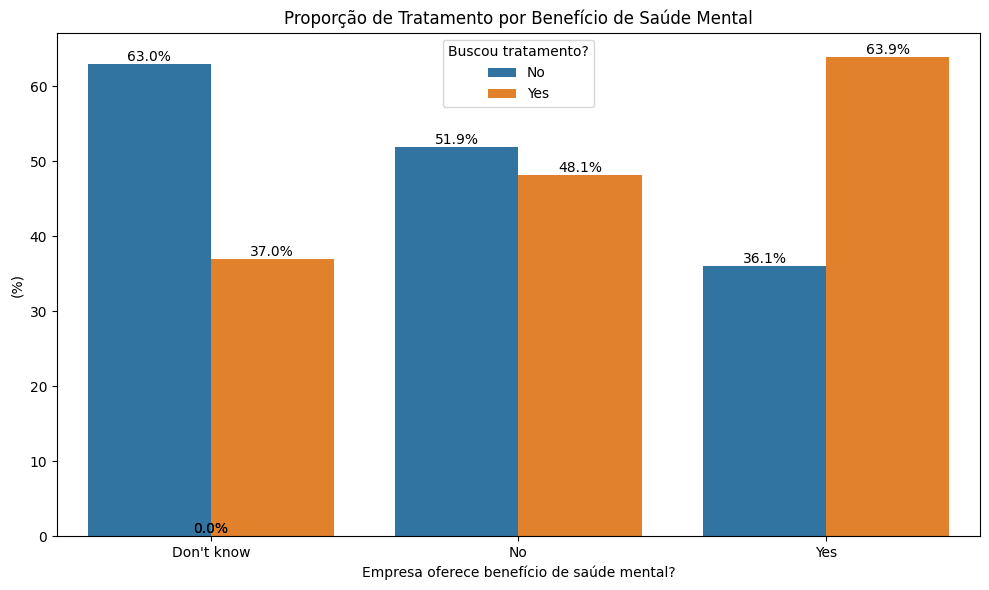

In [210]:
# Proporção de tratamento por tipo de benefício de saúde mental

# Tabela com proporções
benefits_prop = df.groupby(['benefits', 'treatment']).size().reset_index(name='count')
benefits_total = benefits_prop.groupby('benefits')['count'].transform('sum')
benefits_prop['percent'] = benefits_prop['count'] / benefits_total * 100

# Gráfico
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=benefits_prop, x='benefits', y='percent', hue='treatment')
plt.title('Proporção de Tratamento por Benefício de Saúde Mental')
plt.xlabel('Empresa oferece benefício de saúde mental?')
plt.ylabel('(%)')
plt.legend(title='Buscou tratamento?')
plt.xticks(rotation=0)
plt.tight_layout()

for p in barplot.patches:
    height = p.get_height()
    if not np.isnan(height):  # evita erros com valores ausentes
        barplot.annotate(
            f'{height:.1f}%',
            (p.get_x() + p.get_width() / 2., height),
            ha='center', va='bottom',
            fontsize=10, color='black'
        )
plt.show()

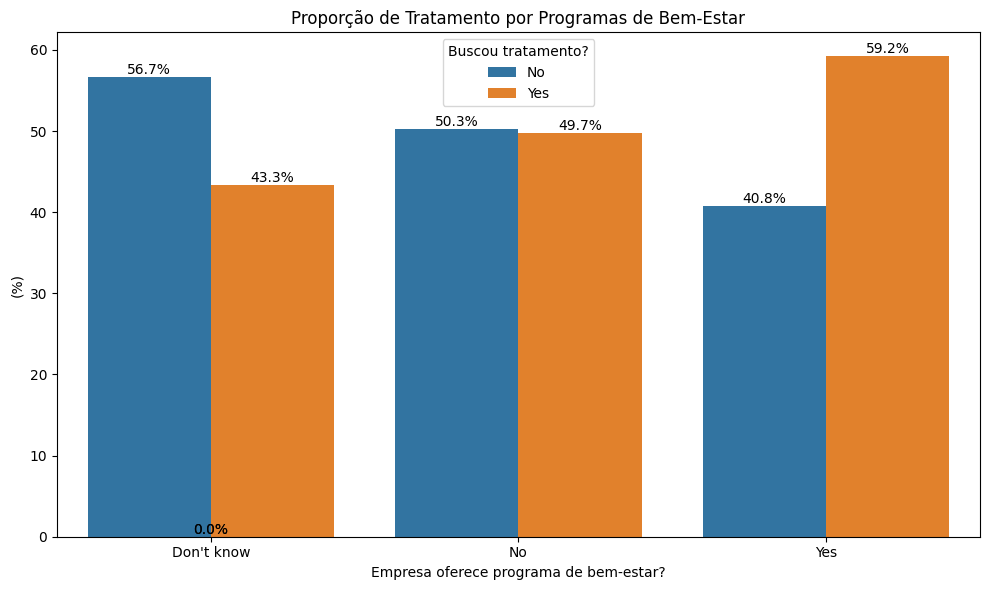

In [211]:
# Proporção % de tratamento por existência de programa de bem-estar

#Tabela de proporções
wellness_prop = df.groupby(['wellness_program', 'treatment']).size().reset_index(name='count')
wellness_total = wellness_prop.groupby('wellness_program')['count'].transform('sum')
wellness_prop['percent'] = wellness_prop['count'] / wellness_total * 100

# Gráfico
plt.figure(figsize=(10,6))
barplot = sns.barplot(data=wellness_prop, x='wellness_program', y='percent', hue='treatment')
plt.title('Proporção de Tratamento por Programas de Bem-Estar')
plt.xlabel('Empresa oferece programa de bem-estar?')
plt.ylabel('(%)')
plt.legend(title='Buscou tratamento?')
plt.xticks(rotation=0)
plt.tight_layout()

for p in barplot.patches:
    height = p.get_height()
    if not np.isnan(height):  # evita erros com valores ausentes
        barplot.annotate(
            f'{height:.1f}%',
            (p.get_x() + p.get_width() / 2., height),
            ha='center', va='bottom',
            fontsize=10, color='black'
        )
plt.show()

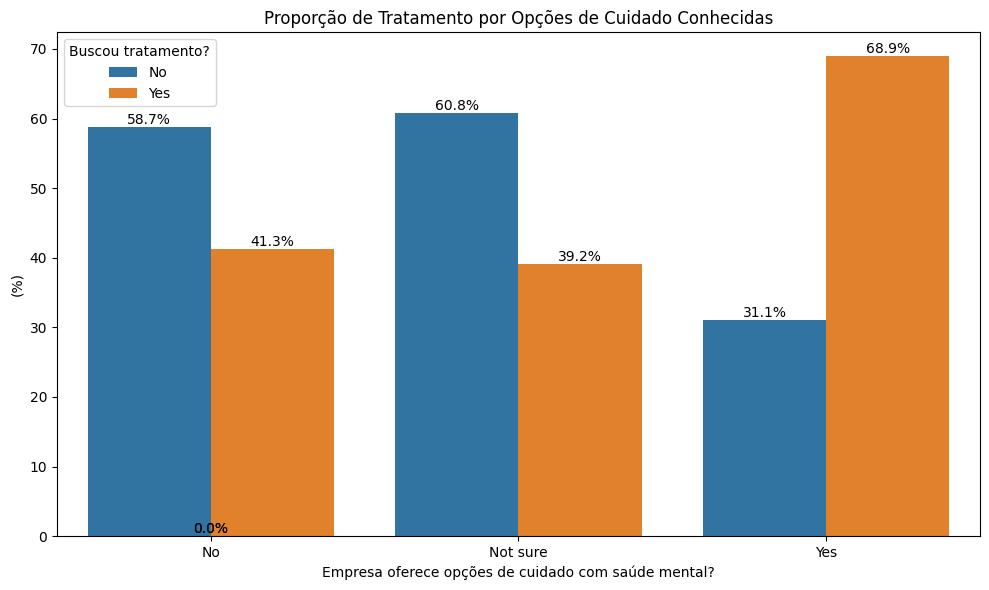

In [212]:
#  Proporção % de tratamento por conhecimento das opções de cuidado

# Tabela com proporções
care_prop = df.groupby(['care_options', 'treatment']).size().reset_index(name='count')
care_total = care_prop.groupby('care_options')['count'].transform('sum')
care_prop['percent'] = care_prop['count'] / care_total * 100

# Gráfico
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=care_prop, x='care_options', y='percent', hue='treatment')
plt.title('Proporção de Tratamento por Opções de Cuidado Conhecidas')
plt.xlabel('Empresa oferece opções de cuidado com saúde mental?')
plt.ylabel('(%)')
plt.legend(title='Buscou tratamento?')
plt.xticks(rotation=0)
plt.tight_layout()

for p in barplot.patches:
    height = p.get_height()
    if not np.isnan(height):  # evita erros com valores ausentes
        barplot.annotate(
            f'{height:.1f}%',
            (p.get_x() + p.get_width() / 2., height),
            ha='center', va='bottom',
            fontsize=10, color='black'
        )
plt.show()

# Análise Estatística das Hipóteses Originais

Etapa de validação estatística das hipóteses levantadas na análise exploratória, mostrando tendências claras por meio de proporções comparativas.


In [213]:
# Benefícios de saúde mental × Busca por tratamento
print("Relação entre Benefits e Treatment:")
print(pd.crosstab(df['benefits'], df['treatment'], normalize='index'))

# Programas de bem-estar × Busca por tratamento
print("\nRelação entre Wellness Program e Treatment:")
print(pd.crosstab(df['wellness_program'], df['treatment'], normalize='index'))

# Conhecimento de opções de cuidado com saúde mental × Busca por tratamento
print("\nRelação entre Care Options e Treatment:")
print(pd.crosstab(df['care_options'], df['treatment'], normalize='index'))

Relação entre Benefits e Treatment:
treatment         No       Yes
benefits                      
Don't know  0.629902  0.370098
No          0.518817  0.481183
Yes         0.360759  0.639241

Relação entre Wellness Program e Treatment:
treatment               No       Yes
wellness_program                    
Don't know        0.566845  0.433155
No                0.502980  0.497020
Yes               0.407895  0.592105

Relação entre Care Options e Treatment:
treatment           No       Yes
care_options                    
No            0.587174  0.412826
Not sure      0.608280  0.391720
Yes           0.310658  0.689342


# Pré-Processamento de Dados

O pré-processamento de dados é uma etapa crucial para preparar os dados para modelagem, garantindo que estejam no formato correto e otimizados para o desempenho do algoritmo.

In [214]:
# Analisa valores únicos de um conjunto específico de colunas do df
list_col=['Age', 'Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence']

for col in list_col:
    print('{} :{} ' . format(col.upper(),df[col].unique()))

AGE :[37. 44. 32. 31. 33. 35. 39. 42. 23. 29. 36. 27. 46. 41. 34. 30. 40. 38.
 50. 24. 18. 28. 26. 22. 19. 25. 45. 21. 43. 56. 60. 54. 55. 48. 20. 57.
 58. 47. 62. 51. 65. 49. nan 53. 61. 72.] 
GENDER :['Female' 'Male' 'Others'] 
SELF_EMPLOYED :['No' 'Yes'] 
FAMILY_HISTORY :['No' 'Yes'] 
TREATMENT :['Yes' 'No'] 
WORK_INTERFERE :['Often' 'Rarely' 'Never' 'Sometimes' "Don't know"] 
NO_EMPLOYEES :['6-25' 'More than 1000' '26-100' '100-500' '1-5' '500-1000'] 
REMOTE_WORK :['No' 'Yes'] 
TECH_COMPANY :['Yes' 'No'] 
BENEFITS :['Yes' "Don't know" 'No'] 
CARE_OPTIONS :['Not sure' 'No' 'Yes'] 
WELLNESS_PROGRAM :['No' "Don't know" 'Yes'] 
SEEK_HELP :['Yes' "Don't know" 'No'] 
ANONYMITY :['Yes' "Don't know" 'No'] 
LEAVE :['Somewhat easy' "Don't know" 'Somewhat difficult' 'Very difficult'
 'Very easy'] 
MENTAL_HEALTH_CONSEQUENCE :['No' 'Maybe' 'Yes'] 
PHYS_HEALTH_CONSEQUENCE :['No' 'Yes' 'Maybe'] 
COWORKERS :['Some of them' 'No' 'Yes'] 
SUPERVISOR :['Yes' 'No' 'Some of them'] 
MENTAL_HEALTH_INTERVI

In [215]:
#  Trata valores nulos da coluna "work_interfere" no df, substituindo por uma categoria padrão
df['work_interfere'] = df['work_interfere'].fillna('Don\'t know' )
print(df['work_interfere'].unique())

['Often' 'Rarely' 'Never' 'Sometimes' "Don't know"]


In [216]:
#  Trata valores nulos da coluna "self_employed" no df, substituindo por uma categoria padrão
df['self_employed'] = df['self_employed'].fillna('No')
print(df['self_employed'].unique())

['No' 'Yes']


In [217]:
# Esse código está verificando os valores únicos da coluna Age, sendo possivel identificar valores irrelevantes/outliers/erros de digitação
print('Verificando irrelevância: ')
df['Age'].unique()

Verificando irrelevância: 


array([37., 44., 32., 31., 33., 35., 39., 42., 23., 29., 36., 27., 46.,
       41., 34., 30., 40., 38., 50., 24., 18., 28., 26., 22., 19., 25.,
       45., 21., 43., 56., 60., 54., 55., 48., 20., 57., 58., 47., 62.,
       51., 65., 49., nan, 53., 61., 72.])

In [218]:
# Substitui idades menores que 18 e maiores que 72 por NaN
df.loc[df['Age'] < 18, 'Age'] = np.nan
df.loc[df['Age'] > 72, 'Age'] = np.nan

## Normalização e Padronização

Preparação dos Dados para Modelagem

Preparei o dataset com variáveis numéricas (via one-hot encoding), separei o target (treatment) das features e dividi em conjuntos de treino e teste para treinar um modelo preditivo.

In [219]:
# Defini a lista de variáveis preditoras (features) — as colunas que o modelo vai usar para aprender.
features = ['Age', 'work_interfere', 'benefits', 'wellness_program', 'care_options']

# One-hot encode categorias não numéricas (simples)
df_model = pd.get_dummies(df[features + ['treatment']], drop_first=True)

# Separa as features (X) do target (y)
X = df_model.drop('treatment_Yes', axis=1)
y = df_model['treatment_Yes']

# Separa os dados em 80% treino/20% teste e 'random_state=42' garante que a divisão seja sempre a mesma (reprodutibilidade).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Train shape:', X_train.shape, 'Test shape:', X_test.shape)

Train shape: (1003, 11) Test shape: (251, 11)


# MinMaxScaler e StandardScaler

Esse código aplica 02 técnicas de normalização de dados sobre os conjuntos de treino e teste, que contêm as variáveis preditoras

In [220]:
# MinMaxScaler
scaler_norm = MinMaxScaler()
X_train_norm = scaler_norm.fit_transform(X_train)
X_test_norm = scaler_norm.transform(X_test)

# StandardScaler
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std = scaler_std.transform(X_test)

# Padronização (standardization) da variável numérica Age usando StandardScaler

Como ficará a distribuição da variável Age após a padronização com média 0 e desvio padrão 1, o que é importante para verificar se o escalonamento foi aplicado corretamente.

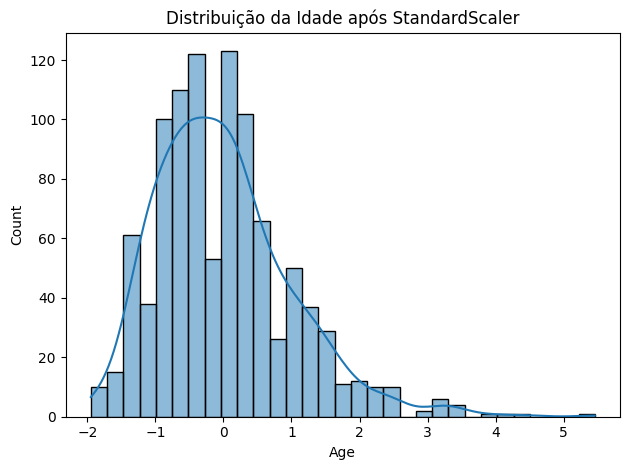

In [221]:
from sklearn.preprocessing import StandardScaler

# Padronizar as características numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[['Age']])

# Visualizar distribuição de 'Age' após padronização
df_standardized = pd.DataFrame(X_train_scaled, columns=['Age'])
sns.histplot(df_standardized['Age'], kde=True)
plt.title('Distribuição da Idade após StandardScaler')
plt.tight_layout()
plt.show()

# Resumo Técnico da Análise dos Dados

**Tratamento de Dados**
- Foram removidas colunas irrelevantes (Timestamp, Country, state, comments).
- Valores nulos foram tratados (ex.: work_interfere preenchido com "Don't know").
- Padronização de gênero (Male, Female, Others) e limpeza de outliers de idade.

**Distribuição Demográfica**
- Maioria homens (78%), média de idade 32 anos (faixa predominante: 25–40 anos).
- Mulheres buscam mais tratamento que homens na mesma faixa etária.

**Programas de Bem-Estar**
- Mais comuns em profissionais 30–45 anos.
- Muitos respondentes não sabem se sua empresa oferece ("Don't know" frequente).

**Limitações dos Dados**
- Os dados de 2014 (pode não refletir cenário atual).
- Desbalanceamento de gênero (78% homens).
- Valores ausentes em colunas importantes (ex.: 21% em work_interfere).

# Conclusão Final

A analise do Dataset estabeleceu uma base sólida para identificar fatores que influenciam a saúde mental no ambiente de trabalho dentro do universo profissional tecnológico. Os dados cruzados e tratados revelam uma associação positiva entre o suporte organizacional e a busca por tratamento de saúde mental. Profissionais que afirmam receber benefícios, ter acesso a programas de bem-estar ou conhecer as opções de cuidado apresentaram taxas mais altas de procura por tratamento. Esses resultados sustentam as hipóteses de que o apoio institucional influencia diretamente o comportamento de autocuidado dos colaboradores.

Em contrapartida, os resultados apresentados com baixa taxa, foi possivel identificar que muitos respondentes não sabem ("Don't know") se existem programas de saude mental dentro das emrpesas. Estes insights podem orientar políticas corporativas para melhorar o acesso a recursos de saúde mental, com foco especial em:

- Melhor comunicação sobre benefícios existentes
- Programas direcionados para profissionais júnior (abaixo de 30 anos)
- Iniciativas para reduzir o estigma, especialmente entre homens

As três hipóteses levantadas foram validadas:

1. Existe relação entre idade e busca por tratamento?
Profissionais em faixas etárias específicas (30-45 anos) buscam mais tratamento.

  Os gráficos de distribuição por idade mostram que:
- Homens e mulheres entre 25-45 anos são os que mais buscam tratamento.
- Mulheres têm maior proporção de busca em comparação com homens na mesma idade.

2. Há diferenças de gênero na busca por tratamento?
Mulheres buscam mais tratamento que homens.

  A categorização de gênero (Male, Female, Others) e os gráficos mostram que:
- Mulheres têm maior taxa de treatment = "Yes" que homens na mesma idade.
- Homens são a maioria no dataset, mas com menor proporção de busca.

3. A idade dos Funcionários implica em existir Programas de Bem-Estar dentro das empresas?
Programas de bem-estar são mais comuns em empresas com funcionários de meia-idade (30+ anos).

  Os histogramas de "wellness_program × Age" indicam que:
- Funcionários acima de 30 anos são os que mais mencionam ter programas de bem-estar.
- Muitos respondentes não sabem ("Don't know") se existem programas.